# Deep Learning Vision


For this challenge, I've selected thr Flickr dataset from https://www.kaggle.com/hsankesara/flickr-image-dataset

## Importing necessary modules

In [3]:
import glob
import shutil
import os
import pathlib
import random
import math
import keras
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from PIL import Image, ImageOps
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, BatchNormalization, concatenate, AveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Copying original dataset to train and test folder

In [4]:
dataset_root_path = pathlib.Path('./dataset/')
dataset_root_path

PosixPath('dataset')

In [5]:
orig_dir = dataset_root_path / 'original'
train_dir = dataset_root_path / 'train'
test_dir = dataset_root_path / 'test'
trial_dir = dataset_root_path / 'trial'

In [ ]:
path, dirs, files = next(os.walk(orig_dir))
file_count = len(files)
file_count

test_count = (0.2*file_count)
print('Number of train images: ', file_count-test_count)
print('Number of test images: ', test_count)

In [ ]:
image_ctr = 1
for jpgfile in glob.iglob(os.path.join(orig_dir, "*.jpg")):
        if image_ctr < test_count:
            shutil.copy(jpgfile, test_dir)
            image_ctr += 1
        else:
            shutil.copy(jpgfile, train_dir)
            image_ctr += 1

## Synthetically turning images upside down and relabelling them

In [ ]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

train_path, train_folder, train_files = next(os.walk(train_dir))
train_file_count = len(train_files)
train_flip_cnt = (0.35*train_file_count)
print('Flipping ', math.ceil(train_flip_cnt), ' training images')

test_path, test_folder, test_files = next(os.walk(test_dir))
test_file_count = len(test_files)
test_flip_cnt = (0.35*test_file_count)
print('Flipping ', math.ceil(test_flip_cnt), ' testing images')

In [ ]:
for i in range(0, math.ceil(train_flip_cnt)):
    random_filename = random.choice([x for x in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, x))])
    if not df_train.empty and random_filename in list(df_train['Image_name'])  or random_filename =='.DS_Store':
        pass
    else:
        # print(random_filename)
        im = Image.open(os.path.join(train_dir, random_filename))
        im_flip = ImageOps.flip(im)
        im_flip.save(os.path.join(train_dir, random_filename), quality=95)
        df_train.loc[i, 'Image_name'] = random_filename
        df_train.loc[i, 'Orientation'] = 1
        
train_ctr = len(df_train)
print(train_ctr)

for file in train_files:
    if file in list(df_train['Image_name']):
        pass
    else:
        df_train.loc[train_ctr, 'Image_name'] = file
        df_train.loc[train_ctr, 'Orientation'] = 0
        train_ctr += 1
        

In [ ]:
df_train.to_csv('./dataset/train.csv', encoding='utf-8')
df_train

In [ ]:
for i in range(0, math.ceil(test_flip_cnt)):
    random_filename = random.choice([x for x in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir, x))])
    if not df_test.empty and random_filename in list(df_test['Image_name']) or random_filename =='.DS_Store':
        pass
    else:
        # print(random_filename)
        im = Image.open(os.path.join(test_dir, random_filename))
        im_flip = ImageOps.flip(im)
        im_flip.save(os.path.join(test_dir, random_filename), quality=95)
        df_test.loc[i, 'Image_name'] = random_filename
        df_test.loc[i, 'Orientation'] = 1
        
test_ctr = len(df_test)
print(test_ctr)

for file in test_files:
    if file in list(df_test['Image_name']):
        pass
    else:
        df_test.loc[test_ctr, 'Image_name'] = file
        df_test.loc[test_ctr, 'Orientation'] = 0
        test_ctr += 1
        

In [ ]:
df_test.to_csv('./dataset/test.csv', encoding='utf-8')
df_test

## Taking train and test from csv

In [6]:
df_train = pd.read_csv(pathlib.Path(dataset_root_path, 'train.csv'))
df_test = pd.read_csv(pathlib.Path(dataset_root_path, 'test.csv'))

In [7]:
train_images = []

for train_id in df_train['Image_name']:
    # print(train_id)
    try:
        #im = plt.imread(pathlib.Path(train_dir, train_id))
        im = Image.open(pathlib.Path(train_dir, train_id))
        im = im.resize((255, 255))
        print(im)
        train_images.append(np.asarray(im))
    except:
        pass

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8FFA10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8FFA10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8FFA10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8FFA10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8FFA10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8FFA10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8FFA10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8FFA10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8FFA10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8FFA10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8FFA10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8FFA10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8FFA10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8FFA10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8FFA10>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F61D90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F61D90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F61D90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F61D90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F61D90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F61D90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F61D90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F61D90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F61D90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F61D90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F6CED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F6CED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F6CED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F6CED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F6CED0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F639D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F639D0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AAD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AAD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AAD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AAD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AAD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AAD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AAD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AAD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AAD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AAD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AAD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AAD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AAD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AAD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AAD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F5ED90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F5ED90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F5ED90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F5ED90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F5ED90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F5ED90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F5ED90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F5ED90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F5ED90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F5ED90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F5ED90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F5ED90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F5ED90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F5ED90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F5ED90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70390>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F680D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F680D0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A850>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A850>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A850>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F78550>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F90B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F90B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F90B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F90B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F90B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F90B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F90B90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F86090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F86090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F86090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F86090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F86090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F86090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F86090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F86090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F86090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F86090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F86090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F86090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F86090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F86090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F86090>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D09210>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D08510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D08510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D08510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D08510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D08510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D08510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D08510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D08510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D08510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83D10>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D26ED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D26ED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D26ED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D26ED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D26ED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D26ED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D26ED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D26ED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D26ED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D26ED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D26ED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D26ED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D26ED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D26ED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D26ED0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70B50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D30110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D30110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D30110>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83ED0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D30A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D30A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D30A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D30A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D30A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D30A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D30A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D30A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D30A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D30A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D30A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D30A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D30A50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945387BD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3B250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3B250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3B250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3B250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3B250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3B250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3B250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3B250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3B250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3B250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3B250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD248D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD248D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD248D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD248D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD248D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD248D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD248D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD248D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD248D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0C510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83210>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3E150>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68710>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68710>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83A90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83A90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83A90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83A90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83A90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83A90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83A90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83A90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83A90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83A90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83A90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83A90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83A90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83A90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83A90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3E150>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AE10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F700D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F700D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83510>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3E6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3E6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3E6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3E6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3E6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3E6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3E6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3E6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3E6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3E6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0C1D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0C1D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0C1D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0C1D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0C1D0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0C3D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0C3D0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68990>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68990>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68990>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68990>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68990>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68990>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68990>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68990>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68990>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68990>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68990>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68990>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68990>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68990>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68990>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10B10>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68950>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68950>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68950>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68950>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68950>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68950>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68950>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68950>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70E10>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24AD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24AD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24AD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24AD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24AD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24AD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83210>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68310>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68710>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68710>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68710>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68710>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68710>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68710>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD24390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83B10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83B10>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A850>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A850>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A850>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A850>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A850>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A850>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D105D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D105D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D105D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D105D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D105D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D105D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D105D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D105D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D105D0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68390>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9DD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9DD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9DD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9DD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9DD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9DD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9DD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9DD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9DD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9DD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9DD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9DD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9DD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9DD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9DD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10410>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D10410>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A4D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A4D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A4D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A4D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A4D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A4D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A4D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A4D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A4D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A4D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A4D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A4D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7A4D0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3ECD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3ECD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3ECD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3ECD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD3ECD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F684D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F684D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F684D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F684D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F684D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F684D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F684D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F684D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F684D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F684D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F684D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F684D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F684D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F684D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F684D0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CF50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C4D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68610>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68610>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68610>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68610>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68610>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68610>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68610>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68610>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0C710>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70D90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83890>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83890>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83890>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83890>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83890>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83890>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83890>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83890>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83890>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83890>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83890>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83890>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83890>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CD10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CD10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CD10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CD10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CD10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CD10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA911D0CD10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AFD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AFD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AFD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AFD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AFD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AFD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AFD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AFD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AFD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AFD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AFD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AFD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AFD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AFD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AFD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C6D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C6D0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F835D0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2C650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303CD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9F90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303F10>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93F303D10>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70950>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F7AB90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E96D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E96D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E96D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E96D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E96D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E96D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E96D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E96D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E96D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E96D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E96D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E96D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E96D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E96D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E96D0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70550>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F70550>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA8EFD2CF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F83E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F705D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E9090>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68190>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68190>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68190>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68190>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68190>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68190>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68190>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68190>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68190>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68190>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA927F68190>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944707650>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8E4E90>
<PIL.Image.Image image mode=RGB size=255

In [8]:
train_images = np.asarray(train_images)

X = train_images
y = df_train['Orientation']

print("Labels: ", y.shape)
print("images: ", X.shape)

Labels:  (25388,)
images:  (25388, 255, 255, 3)


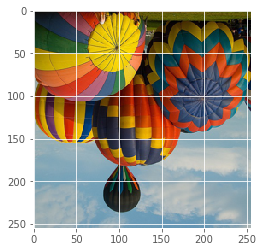

In [41]:
plt.imshow(X[1])

In [10]:
def conv_layer(conv_x, filters):
    conv_x = BatchNormalization()(conv_x)
    conv_x = Activation('relu')(conv_x)
    conv_x = Conv2D(filters, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(conv_x)
    conv_x = Dropout(0.2)(conv_x)

    return conv_x


def dense_block(block_x, filters, growth_rate, layers_in_block):
    for i in range(layers_in_block):
        each_layer = conv_layer(block_x, growth_rate)
        block_x = concatenate([block_x, each_layer], axis=-1)
        filters += growth_rate

    return block_x, filters


def transition_block(trans_x, tran_filters):
    trans_x = BatchNormalization()(trans_x)
    trans_x = Activation('relu')(trans_x)
    trans_x = Conv2D(tran_filters, (1, 1), kernel_initializer='he_uniform', padding='same', use_bias=False)(trans_x)
    trans_x = AveragePooling2D((2, 2), strides=(2, 2))(trans_x)

    return trans_x, tran_filters


def dense_net(filters, growth_rate, classes, dense_block_size, layers_in_block):
    input_img = Input(shape=(255, 255, 3))
    x = Conv2D(24, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(input_img)

    dense_x = BatchNormalization()(x)
    dense_x = Activation('relu')(x)

    dense_x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(dense_x)
    for block in range(dense_block_size - 1):
        dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
        dense_x, filters = transition_block(dense_x, filters)

    dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
    dense_x = BatchNormalization()(dense_x)
    dense_x = Activation('relu')(dense_x)
    dense_x = GlobalAveragePooling2D()(dense_x)

    output = Dense(classes, activation='softmax')(dense_x)

    return Model(input_img, output)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33)

Cat_val_y = np_utils.to_categorical(y_val)
y_train = np_utils.to_categorical(y_train)

print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",X_val.shape)
print("y_test shape : ",y_val.shape)

X_train shape :  (17009, 255, 255, 3)
y_train shape :  (17009, 2)
X_test shape :  (8379, 255, 255, 3)
y_test shape :  (8379,)


In [12]:
dense_block_size = 3
layers_in_block = 4

growth_rate = 12
classes = 2
model = dense_net(growth_rate * 2, growth_rate, classes, dense_block_size, layers_in_block)
model.summary()


# training
batch_size = 32
epochs = 10
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 255, 255, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 255, 255, 24) 648         input_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 255, 255, 24) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 24) 0           activation_1[0][0]               
_________

In [13]:
history = model.fit(
    X_train,
    y_train, 
    epochs=epochs, 
    batch_size=batch_size, shuffle=True,
    validation_data=(X_val, Cat_val_y))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 17009 samples, validate on 8379 samples
Epoch 1/10
17009/17009 [==============================] - 8257s 485ms/step - loss: 0.5650 - accuracy: 0.7420 - val_loss: 0.5701 - val_accuracy: 0.7351
Epoch 2/10
17009/17009 [==============================] - 9361s 550ms/step - loss: 0.5136 - accuracy: 0.7553 - val_loss: 0.4909 - val_accuracy: 0.7592
Epoch 3/10
17009/17009 [==============================] - 9959s 586ms/step - loss: 0.4597 - accuracy: 0.7814 - val_loss: 0.4868 - val_accuracy: 0.7587
Epoch 4/10
17009/17009 [==============================] - 9133s 537ms/step - loss: 0.4272 - accuracy: 0.8016 - val_loss: 0.4394 - val_accuracy: 0.7917
Epoch 5/10
17009/17009 [==============================] - 5133s 302ms/step - loss: 0.4085 - accuracy: 0.8118 - val_loss: 0.5958 - val_accuracy: 0.7150
Epoch 6/10
17009/17009 [==============================] - 6254s 368ms/step - loss: 0.3950 - accuracy:

Generating plots...


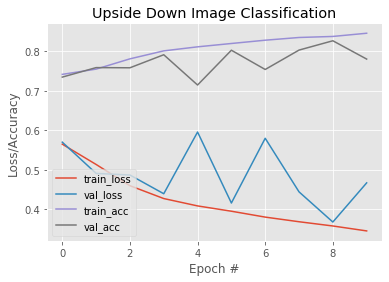

In [26]:
print("Generating plots...")
sys.stdout.flush()
#matplotlib.use("Agg")
plt.style.use("ggplot")
plt.figure()
N = epochs 
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Upside Down Image Classification")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
# plt.savefig("plot.png")

In [22]:
test_images = []

for test_id in df_test['Image_name']:
    # print(train_id)
    try:
        #im = plt.imread(pathlib.Path(train_dir, train_id))
        im = Image.open(pathlib.Path(test_dir, test_id))
        im = im.resize((255, 255))
        print(im)
        test_images.append(np.asarray(im))
    except:
        pass

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8A50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8A50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597450>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05A5250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05A5250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05A5250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05A5250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05A5250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05A5250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05A5250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05A5250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05A5250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05A5250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05A5250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05A5250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05A5250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05A5250>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05A5250>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BBA25150>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BBA25150>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BBA25150>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BBA25150>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BBA25150>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BBA25150>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BBA25150>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BBA25150>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BBA25150>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BBA25150>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BBA25150>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BBA25150>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BBA25150>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BBA25150>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BBA25150>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF189BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF189BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF189BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF189BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF189BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF189BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF189BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF189BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF189BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF189BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF189BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF189BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF189BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF189BD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF189BD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C09884D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C09884D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C09884D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C09884D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C09884D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C09884D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C09884D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C09884D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C09884D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C09884D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C09884D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C09884D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C09884D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C09884D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C09884D0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0664E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0664E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0664E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0664E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0664E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0664E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0664E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0664E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0664E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0664E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0664E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0664E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0664E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0664E10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0664E10>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BB8755D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BB8755D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BB8755D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BB8755D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BB8755D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BB8755D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BB8755D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BB8755D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BB8755D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BB8755D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BB8755D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BB8755D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BB8755D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BB8755D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BB8755D0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597410>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597410>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597410>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597410>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597410>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597410>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597410>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597410>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597410>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597410>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597410>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597410>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597410>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597410>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C3597410>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D8790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BA0F7CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BA0F7CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BA0F7CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BA0F7CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BA0F7CD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C06F88D0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F65090>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA9453A0050>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C4320450>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D3CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D3CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D3CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D3CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D3CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D3CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D3CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D3CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D3CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D3CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D3CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D3CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D3CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D3CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D3CD0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA945217790>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C01C8110>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D37D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D37D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D37D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D37D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D37D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D37D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D37D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D37D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C43D37D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8DAE50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8DAE50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8DAE50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8DAE50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8DAE50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA93C8DAE50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B96090>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C2F690D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0216C50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0BACF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0BACF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0BACF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0BACF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0BACF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0BACF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0BACF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0BACF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0BACF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0BACF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0BACF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0BACF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0BACF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0BACF10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0BACF10>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF70BC10>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BA454CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BA454CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BA454CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BA454CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BA454CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BA454CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BA454CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BA454CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BA454CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BA454CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BA454CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BA454CD0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BED1B690>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BED1B690>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BED1B690>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C05D88D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B9A1D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B9A1D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B9A1D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B9A1D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B9A1D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B9A1D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B9A1D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B9A1D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B9A1D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B9A1D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B9A1D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B9A1D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B9A1D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B9A1D0>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5BF62CF50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA944774F50>
<PIL.Image.Image image mode=RGB size=255

<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B964D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B964D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B964D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B964D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B964D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B964D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B964D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B964D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B964D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B964D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B964D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B964D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B964D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B964D0>
<PIL.Image.Image image mode=RGB size=255x255 at 0x7FA5C0B964D0>
<PIL.Image.Image image mode=RGB size=255

In [27]:
test_images = np.asarray(test_images)

X_test = test_images
y_test = df_test['Orientation']
Cat_test_y = np_utils.to_categorical(y_test)

In [28]:
label_pred = model.predict(X_test)
print(label_pred)

[[8.9418274e-01 1.0581729e-01]
 [4.8484477e-01 5.1515520e-01]
 [5.9876114e-01 4.0123889e-01]
 ...
 [9.8970068e-01 1.0299333e-02]
 [9.9933976e-01 6.6020037e-04]
 [9.9766684e-01 2.3331661e-03]]


In [29]:
pred = []

for i in range(len(label_pred)):
    pred.append(np.argmax(label_pred[i]))

Y_test = np.argmax(Cat_test_y, axis=1)

print(metrics.classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      4712
           1       0.86      0.22      0.35      1635

    accuracy                           0.79      6347
   macro avg       0.82      0.60      0.61      6347
weighted avg       0.80      0.79      0.74      6347



In [34]:
for i in range(0, 10):
    print(Y_test[i], ' ', pred[i])

1   0
1   1
1   0
1   0
1   1
1   1
1   0
1   0
1   0
1   0


## Some images that were predicted wrong were in the position 0, 2, 3

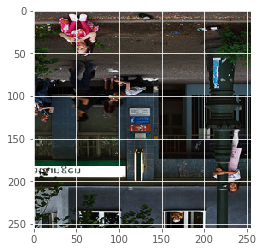

In [39]:
plt.imshow(X_test[0])

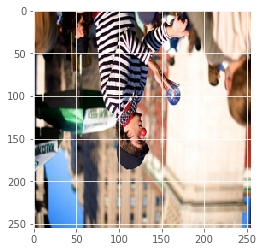

In [38]:
plt.imshow(X_test[2])

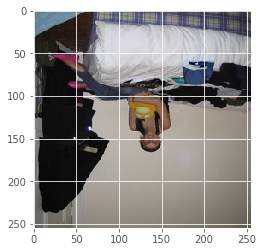

In [40]:
plt.imshow(X_test[3])

### What is 1 idea that you have to improve your model's performance on this dataset?

1. Better convolutions could result in better classification accuracy.
2. We could take the peripheral area of images to decide it's orientation. The idea is splitting an image into NxN blocks, and classify the images based only on the peripheral sub-blocks.